In [1]:
from IPython.display import Markdown

import sys
sys.path.append('..')
from utils import *

In [24]:
prompt_template='../prompt_template.md'
arxiv_number='2111.01152'
prompt_dict=load_prompt_template(prompt_template)
with open(f'{arxiv_number}.yaml','r') as f:
    kwargs= yaml.safe_load(f)

In [25]:
prompt=generate_prompt(kwargs[16],prompt_dict)

In [26]:
Markdown(prompt['content'])

You will now be instructed to combine the Hartree term $H_{\text{Hartree}}$ and the Fock term $H_{\text{Fock}}$.  
You should recall that the Hartree term $H_{\text{Hartree}} = \frac{1}{V}\sum_{\tau_1,\tau_2,l_1,l_2,k_1,k_2,q_1,q_2,q_3,q_4} \langle b_{l_1,\tau_1,q_1}^\dagger(k_1) b_{l_1,\tau_1,q_4}(k_1) \rangle b_{l_2,\tau_2,q_2}^\dagger(k_2) b_{l_2,\tau_2,q_3}(k_2)  V(|q_1-q_4|)\delta_{k_1+q_1+q_2,k_2+q_3+q_4}$,  
and the Fock term $H_{\text{Fock}} = -\frac{1}{V}\sum_{\tau_1,\tau_2,l_1,l_2,k_1,k_2,q_1,q_2,q_3,q_4} \langle b_{l_1,\tau_1,q_1}^\dagger(k_1) b_{l_2,\tau_2,q_3}(k_1) \rangle b_{l_2,\tau_2,q_2}^\dagger(k_2) b_{l_1,\tau_1,q_4}(k_2) V(|k_1+q_1-k_2-q_4|)\delta_{q_1+q_2,q_3+q_4}$.  
You should perform the same trick of relabeling the index in the Fock term to make the quadratic operators in the Fock term the same as those in the Hartree term. The relabeling should be done with a swap : Not needed.
You should add them, relabel the index in Fock term, and simply their sum. 
Return the final sum of Hartree and Fock term.

In [5]:
print(prompt['content'])

You will be instructed to describe the kinetic term of Hamiltonian in a system with two layers in the real space in the single-particle form.   
The degrees of freedom of the system are: valley index (+K and -K valley), layer index (top and bottom layer)..  
Express the Kinetic Hamiltonian H_{\tau} using variables which are only on the diagonal terms, and arrange the basis in the order of (+K,bottom), (+K,top), (-K,bottom), (-K,top). 

Use the following conventions for the symbols:  
$\tau=\pm 1$ represents $\pm K$ valleys, $\bm{\kappa}=\frac{4\pi}{3a_M}\left(1,0\right)$ is at a corner of the moiré Brillouin zone. The $2\times 2$ Hamiltonian hybridizes the bottom layer ($\mathfrak{b}$) and top layer ($\mathfrak{t}$), where the off diagonal terms describe the interlayer tunneling $\Delta_{\text{T},\tau}$, and the diagonal terms describe the momentum-shifted kinetic energy with the effective mass $(m_{\mathfrak{b}},m_{\mathfrak{t}})=(0.65,0.35)m_e$ ($m_e$ is the rest electron mass), plus

In [ ]:
with open(f'{arxiv_number}_tmp.yaml','w') as f:
    # kwargs= yaml.safe_load(f)
    yaml.dump(prompt,f,default_flow_style=False,sort_keys=False)

In [11]:
data = {
    'key': 'this is line1\nthis is line2\n'
}

with open(f'{arxiv_number}_tmp.yaml','w') as file:
    yaml.dump(data, file,default_style='|', default_flow_style=False)

In [4]:
import matplotlib as plt

In [5]:
kwargs[1]['score']

{'in_paper': 1,
 'prompt_quality': 1,
 'follow_instructions': 1,
 'physics_logic': 2,
 'math_derivation': 2,
 'final_answer_accuracy': 1}

In [7]:
tasks = [f'Task:{len(kwargs)-idx-2} '+kwarg['task'] for idx,kwarg in enumerate(kwargs[:0:-1])]
aspect_score={}
for kwarg in kwargs[:0:-1]:
    for key,value in reversed(list(kwarg['score'].items())):
        if key not in aspect_score:
            aspect_score[key]=[value]
        else:
            aspect_score[key].append(value)

In [8]:
aspect_score

{'final_answer_accuracy': [2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1],
 'math_derivation': [2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2],
 'physics_logic': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 'follow_instructions': [2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1],
 'prompt_quality': [1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1],
 'in_paper': [2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1]}

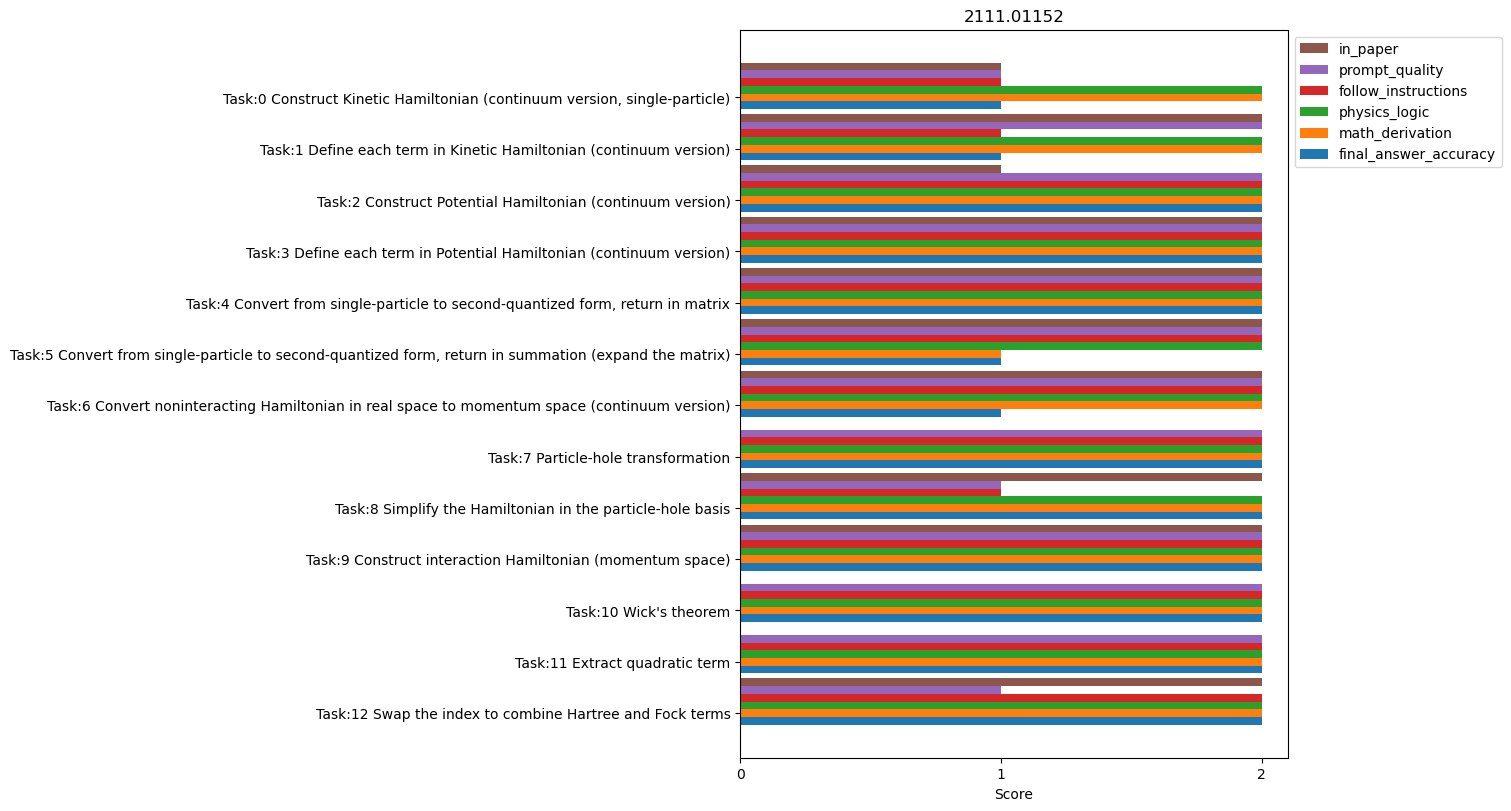

In [9]:
import matplotlib.pyplot as plt
import numpy as np

tasks = [f'Task:{len(kwargs)-idx-2} '+kwarg['task'] for idx,kwarg in enumerate(kwargs[:0:-1])]
aspect_score={}
for kwarg in kwargs[:0:-1]:
    for key,value in reversed(list(kwarg['score'].items())):
        if key not in aspect_score:
            aspect_score[key]=[value]
        else:
            aspect_score[key].append(value)


x = np.arange(len(tasks))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained',figsize=(15,8))

for attribute, measurement in aspect_score.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Score')
ax.set_xticks([0,1,2])
ax.set_title(f'{arxiv_number}')
ax.set_yticks(x + width, tasks)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='upper left', ncols=1,bbox_to_anchor=(1, 1))


# ax.set_ylim(0, 250)

plt.show()

In [65]:
aspect_score

{'prompt_quality': [1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2],
 'follow_instructions': [2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1],
 'physics_logic': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 'math_derivation': [2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2],
 'final_answer_accuracy': [2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1]}

In [75]:
aspect_score={}

for kwarg in kwargs[:0:-1]:
    for key,value in kwarg['score'].items():
        if key not in aspect_score:
            aspect_score[key]=[value]
        else:
            aspect_score[key].append(value)

In [76]:
aspect_score


{'prompt_quality': [1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1],
 'follow_instructions': [2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1],
 'physics_logic': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 'math_derivation': [2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2],
 'final_answer_accuracy': [2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1]}